In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplhep as hep

from scipy.optimize import curve_fit
from iminuit import Minuit
from iminuit.cost import LeastSquares
from LatexConstants import *

In [2]:
dir ="../reco_eff/"
data = pd.read_csv(f"{dir}efficiency.txt", sep = ' ', names=['run', 'efficiency', 'error'])

In [3]:
runs = [2121, 2124, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137]
Run = [i for i in data['run'].values if i in runs]
HV = [510, 490, 450, 480, 500, 420, 400, 470, 350, 435]
efficiency = [data['efficiency'][data['run']==i].values[0] for i in data['run'].values if i in runs]
error = [data['error'][data['run']==i].values[0] for i in data['run'].values if i in runs]

In [4]:
# Example arrays
array1 = HV
array2 = efficiency
array3 = error

# Pair the elements of the arrays together
paired_arrays = list(zip(array1, array2, array3))

# Sort the pairs based on the first array
sorted_pairs = sorted(paired_arrays, key=lambda pair: pair[0])

# Unzip the pairs back into two separate arrays
sorted_array1, sorted_array2, sorted_array3 = zip(*sorted_pairs)

# Convert the sorted arrays back to lists (optional)
HV = list(sorted_array1)
efficiency = list(sorted_array2)
error = list(sorted_array3)

In [5]:
def sigmoid(x, a, b, c, d):
    return a*(1/(1+ np.exp(-b*(x-c)))) + d

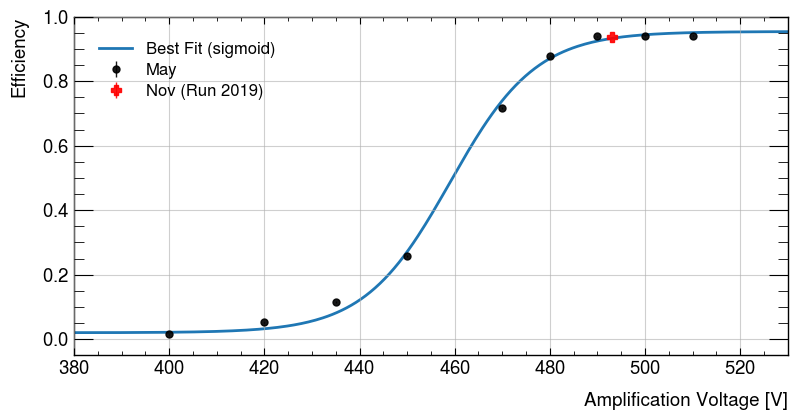

In [10]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(1.5*textwidth, 0.5*textheight), dpi = 100)

plt.errorbar(HV, efficiency, yerr = error, color = 'k', lw = 1, capsize = 0,fmt = 'o', 
             zorder = 10, label = 'May', markersize = 5, alpha = 0.9)


ls = LeastSquares(HV[1:], efficiency[1:], error[1:], sigmoid)
m = Minuit(ls, a=0.9341789694343369, b=0.110513029840921, c=459.04988779326527, d=0.019910822035498786)
m.migrad()

x = np.linspace(300, 550, 500)
plt.plot(x, sigmoid(x, *m.values), label = 'Best Fit (sigmoid)')

plt.errorbar(490+3, 0.9359756810475857, 0.0011837514608180988, color = 'red', lw = 1, capsize = 0,fmt = 'P', 
             zorder = 10, markersize = 7, alpha = 0.9,label = 'Nov (Run 2019)')


plt.xlabel('Amplification Voltage [V]', fontsize = 0.9*fontsize)
plt.ylabel('Efficiency', fontsize = 0.9*fontsize)
plt.xlim(380,530)
plt.ylim(-0.05,1)
plt.tick_params(axis='both', which='major', labelsize=0.9*fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
plt.legend(fontsize=0.8*fontsize)
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.savefig(f'{dir}/EfficiencyExMe_withNoV.png', transparent = True)
plt.savefig(f'{dir}/EfficiencyExMe_withNov.pdf')
# plt.grid(lw = 1, alpha = 0.4, zorder = 0)